# 溫度與捷運運輸量的相關性

資料來源:https://data.gov.tw/dataset/61797
https://www.cwb.gov.tw/

主要想探討溫度與捷運運輸量之間是否有出現相關性。

#讀取2016年及2017年每月份的捷運運輸量
 Month 為月份
 Average transport amout 為每月份總運輸量的平均值(單位:人次)
 temperature為2016/2017年月均溫

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# This is a custom matplotlib style that I use for most of my charts
#plt.style.use('https://gist.githubusercontent.com/rhiever/d0a7332fe0beebfdc3d5/raw/205e477cf231330fe2f265070f7c37982fd3130c/tableau10.mplstyle')

MRT_AVG = pd.read_csv('MRT_month.csv')
MRT_AVG.head()


,Month,Average Transport Amount (people),temperature
0,201601,2015843,16.2
1,201602,1926929,15.5
2,201603,2099816,17.5
3,201604,1993945,24.0
4,201605,2020689,27.1


''

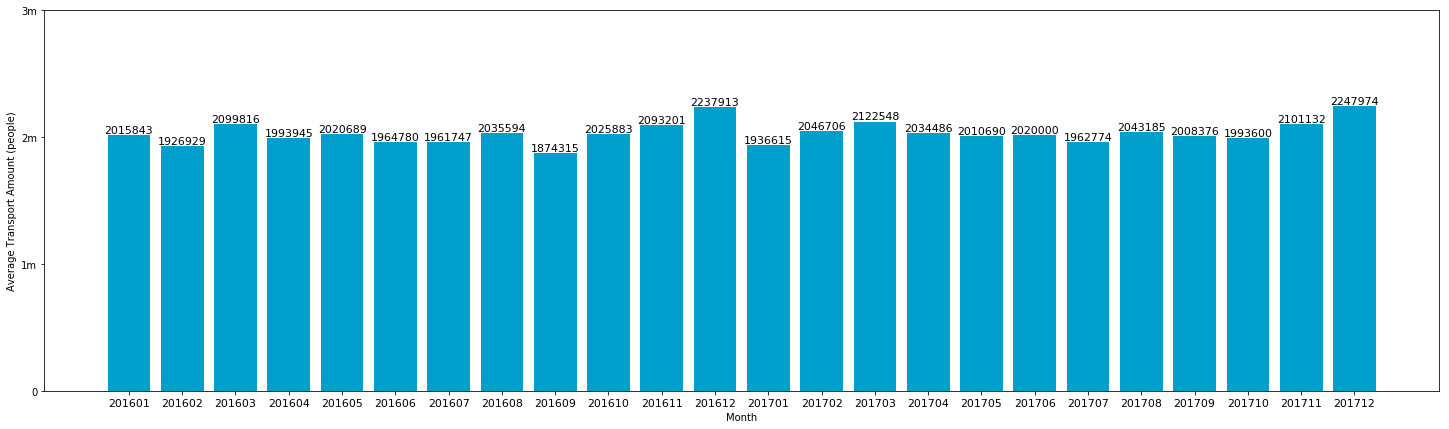

In [19]:
fig = plt.figure(figsize=(25, 7))
ax1 = fig.add_subplot(111)

for (i, row) in MRT_AVG.iterrows():
    plt.bar([i - 0.2, i + 0.2], [row['Average Transport Amount (people)']],
            color=['#009FCC'], width=0.4, align='center', edgecolor='none')
    
#plt.xlim(-0.6, 20.6)
plt.xticks(range(0, 24), MRT_AVG['Month'], fontsize=11)
plt.grid(False, axis='x')
plt.yticks(np.arange(0, 4e6, 1e6),
           ['{}m'.format(int(x / 1e6)) if x > 0 else 0 for x in np.arange(0, 4e6, 1e6)])

for x,y in enumerate(MRT_AVG['Average Transport Amount (people)']):

    plt.text(x, y+0.05, '%.0f' % y, ha='center', va= 'bottom',fontsize=11)

plt.xlabel('Month')
plt.ylabel('Average Transport Amount (people)')

plt.savefig('pop_pyramid_grouped.pdf')
;

上方圖示為每月份總運輸量的直條圖
每個柱狀上方為總運輸人數的平均值


In [21]:
y = MRT_AVG['Average Transport Amount (people)']
y

0     2015843
1     1926929
2     2099816
3     1993945
4     2020689
5     1964780
6     1961747
7     2035594
8     1874315
9     2025883
10    2093201
11    2237913
12    1936615
13    2046706
14    2122548
15    2034486
16    2010690
17    2020000
18    1962774
19    2043185
20    2008376
21    1993600
22    2101132
23    2247974
Name: Average Transport Amount (people), dtype: int64

上方為列出2016/2017年每個月運輸量的平均值
(0代表2016年一月，1代表2016年二月，以此類推)

In [22]:
x = MRT_AVG['temperature']
x

0     16.2
1     15.5
2     17.5
3     24.0
4     27.1
5     29.4
6     30.3
7     30.1
8     27.8
9     27.0
10    22.6
11    20.1
12    18.3
13    17.0
14    18.2
15    22.5
16    25.6
17    28.0
18    30.3
19    31.1
20    29.6
21    25.6
22    22.5
23    17.8
Name: temperature, dtype: float64

上方為列出2016/2017年的月均溫
(0代表2016年一月，1代表2016年二月，以此類推)

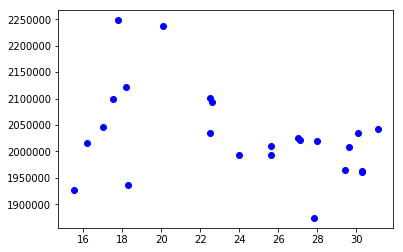

In [23]:
plt.plot(x,y, 'bo')

上方為分布圖
X軸為溫度
Y軸為人次

從圖可看出氣溫與搭乘量似乎沒有太大的關聯，為了要證明此事，我們將數值算出。

In [25]:
stats.pearsonr(x,y)

(-0.372243219728734, 0.07325038652603828)

從數值上我們可以發現氣溫與搭乘量沒有太大的關聯，因為相關係數只有-0.37且P值達0.07。

但是氣溫與搭乘量呈現負相關的情況卻似乎是合理的情形。